In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from scipy import stats

# Feature Selection

### Number of Features

In [38]:
n = 16

### Plot correlation heatmap

<AxesSubplot:>

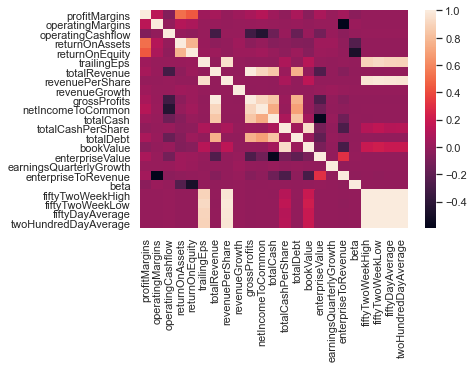

In [39]:
corr1 = x_scaled_df.corr()
sns.heatmap(corr1, xticklabels = corr1.columns.values,
           yticklabels=corr1.columns.values)

## Method 1: Feature score  with f_regression

In [40]:
"""
Resource 1
Resource 2
"""

# configure to select all features
fs1 = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs1.fit(x_scaled, y)
# transform train input data
X_train_fs1 = fs1.transform(x_scaled)
# transform test input data

0 profitMargins : 8.8
1 operatingMargins : 0.27
2 operatingCashflow : 113.53
3 returnOnAssets : 0.0
4 returnOnEquity : 1.76
5 trailingEps : 0.07
6 totalRevenue : 3272.66
7 revenuePerShare : 0.08
8 revenueGrowth : 0.0
9 grossProfits : 2480.71
10 netIncomeToCommon : 3838.96
11 totalCash : 1089.45
12 totalCashPerShare : 0.66
13 totalDebt : 670.12
14 bookValue : 0.0
15 enterpriseValue : 7.0
16 earningsQuarterlyGrowth : 0.03
17 enterpriseToRevenue : 0.19
18 beta : 0.06
19 fiftyTwoWeekHigh : 0.06
20 fiftyTwoWeekLow : 0.07
21 fiftyDayAverage : 0.05
22 twoHundredDayAverage : 0.05


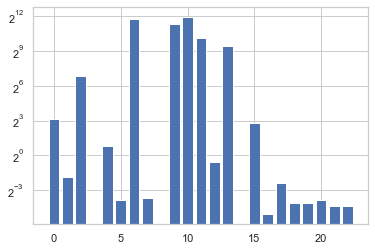

In [41]:
fs1.scores_ = fs1.scores_.round(2)

# what are scores for the features
for i in range(len(fs1.scores_)):
    print('{} {} : {}'.format(i, headers[i], fs1.scores_[i]))
    
    
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.yscale('log', base = 2)
plt.show()

### Get highest ranked features and filter dataframe by them

In [42]:
scores_dict1 = dict(zip(headers, fs1.scores_))
scores_dict1 = dict(sorted(scores_dict1.items(), reverse=True, key=lambda item: item[1]))

best_features1 = list(scores_dict1.items())[:n]
best_feature_names1 = [i for (i, j) in best_features1]

pd.DataFrame(best_feature_names1).to_csv('best_feature_names1.csv', index=False)

x_scaled_df1 = x_scaled_df[best_feature_names1]

x_scaled_df1.to_csv('x1_fregression.csv', index = False)

x_scaled_df1.columns

Index(['netIncomeToCommon', 'totalRevenue', 'grossProfits', 'totalCash',
       'totalDebt', 'operatingCashflow', 'profitMargins', 'enterpriseValue',
       'returnOnEquity', 'totalCashPerShare', 'operatingMargins',
       'enterpriseToRevenue', 'revenuePerShare', 'trailingEps',
       'fiftyTwoWeekLow', 'beta'],
      dtype='object')

## Method 2: Feature score with mutual_info_regression

In [43]:
"""
Resource 1
Resource 3
"""

# configure to select all features
fs2 = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs2.fit(x_scaled, y)
# transform train input data
X_train_fs2 = fs2.transform(x_scaled)
# transform test input data

0 profitMargins : 0.13
1 operatingMargins : 0.15
2 operatingCashflow : 0.75
3 returnOnAssets : 0.03
4 returnOnEquity : 0.06
5 trailingEps : 0.05
6 totalRevenue : 1.27
7 revenuePerShare : 0.06
8 revenueGrowth : 0.0
9 grossProfits : 1.29
10 netIncomeToCommon : 1.42
11 totalCash : 0.62
12 totalCashPerShare : 0.03
13 totalDebt : 0.54
14 bookValue : 0.05
15 enterpriseValue : 0.78
16 earningsQuarterlyGrowth : 0.01
17 enterpriseToRevenue : 0.04
18 beta : 0.12
19 fiftyTwoWeekHigh : 0.12
20 fiftyTwoWeekLow : 0.08
21 fiftyDayAverage : 0.11
22 twoHundredDayAverage : 0.12


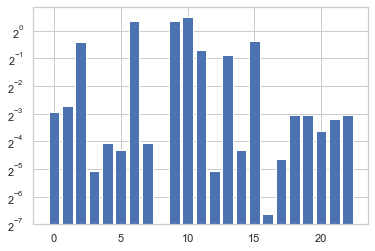

In [44]:
fs2.scores_ = fs2.scores_.round(2)

# what are scores for the features
for i in range(len(fs2.scores_)):
    print('{} {} : {}'.format(i, headers[i], fs2.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.yscale('log', base = 2)
plt.show()

### Get highest ranked features and filter dataframe by them

In [45]:
scores_dict2 = dict(zip(headers, fs2.scores_))
scores_dict2 = dict(sorted(scores_dict2.items(), reverse=True, key=lambda item: item[1]))


best_features2 = list(scores_dict2.items())[:n]
best_feature_names2 = [i for (i, j) in best_features2]
pd.DataFrame(best_feature_names2).to_csv('best_feature_names2.csv', index=False)
x_scaled_df2 = x_scaled_df[best_feature_names2]

x_scaled_df2.to_csv('x2_mutualinforegression.csv', index = False)

x_scaled_df2.columns

Index(['netIncomeToCommon', 'grossProfits', 'totalRevenue', 'enterpriseValue',
       'operatingCashflow', 'totalCash', 'totalDebt', 'operatingMargins',
       'profitMargins', 'beta', 'fiftyTwoWeekHigh', 'twoHundredDayAverage',
       'fiftyDayAverage', 'fiftyTwoWeekLow', 'returnOnEquity',
       'revenuePerShare'],
      dtype='object')

## Method 3: Tree-based feature selection

In [46]:
"""
Resource 4
"""

fs3 = ExtraTreesRegressor(n_estimators=200, random_state=5)
fs3 = fs3.fit(x_scaled, y)
fs3.feature_importances_

array([0.00647475, 0.00759703, 0.00436333, 0.03318115, 0.01373404,
       0.01738529, 0.26660252, 0.00509504, 0.00729734, 0.21227879,
       0.27217191, 0.02802589, 0.00368022, 0.01151052, 0.00528016,
       0.012566  , 0.0080129 , 0.00539578, 0.00684195, 0.01289082,
       0.01925087, 0.01948737, 0.02087633])

In [47]:
fs3_array = fs3.feature_importances_

fs3_df = np.transpose(fs3_array)
fs3_df = pd.DataFrame(fs3_df[None], columns = headers)

fs3_df

,profitMargins,operatingMargins,operatingCashflow,returnOnAssets,returnOnEquity,trailingEps,totalRevenue,revenuePerShare,revenueGrowth,grossProfits,...,totalDebt,bookValue,enterpriseValue,earningsQuarterlyGrowth,enterpriseToRevenue,beta,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiftyDayAverage,twoHundredDayAverage
0,0.006475,0.007597,0.004363,0.033181,0.013734,0.017385,0.266603,0.005095,0.007297,0.212279,...,0.011511,0.00528,0.012566,0.008013,0.005396,0.006842,0.012891,0.019251,0.019487,0.020876


0 profitMargins : 0.00647474652326119
1 operatingMargins : 0.007597031212517399
2 operatingCashflow : 0.004363325908097111
3 returnOnAssets : 0.0331811475483312
4 returnOnEquity : 0.01373404138464153
5 trailingEps : 0.017385286057627222
6 totalRevenue : 0.26660251611946245
7 revenuePerShare : 0.005095037951663877
8 revenueGrowth : 0.007297343518286449
9 grossProfits : 0.21227879383467302
10 netIncomeToCommon : 0.27217190638353245
11 totalCash : 0.028025894440536894
12 totalCashPerShare : 0.003680220153757569
13 totalDebt : 0.011510516895973976
14 bookValue : 0.005280162346612667
15 enterpriseValue : 0.012566002549307119
16 earningsQuarterlyGrowth : 0.008012896437428947
17 enterpriseToRevenue : 0.00539578436531792
18 beta : 0.006841953389559846
19 fiftyTwoWeekHigh : 0.012890823849180498
20 fiftyTwoWeekLow : 0.01925086686759762
21 fiftyDayAverage : 0.019487372755121753
22 twoHundredDayAverage : 0.02087632950751109


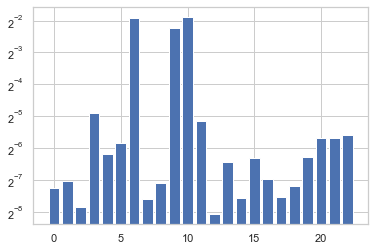

In [48]:
# what are scores for the features
for i in range(len(fs3_array)):
    print('{} {} : {}'.format(i, headers[i], fs3_array[i]))


# plot the scores
plt.bar([i for i in range(len(fs3_array))], fs3_array)
plt.yscale('log', base = 2)
plt.show()


In [49]:
model = SelectFromModel(fs3, prefit=True)
X_train_fs3 = model.transform(x_scaled)

### Get highest ranked features and filter dataframe by them

In [50]:
scores_dict3 = dict(zip(headers, fs3_array))
scores_dict3 = dict(sorted(scores_dict3.items(), reverse=True, key=lambda item: item[1]))


best_features3 = list(scores_dict3.items())[:n]
best_feature_names3 = [i for (i, j) in best_features3]
pd.DataFrame(best_feature_names3).to_csv('best_feature_names3.csv', index=False)
x_scaled_df3 = x_scaled_df[best_feature_names3]

x_scaled_df3.to_csv('x3_treebased.csv', index = False)

x_scaled_df3.columns

Index(['netIncomeToCommon', 'totalRevenue', 'grossProfits', 'returnOnAssets',
       'totalCash', 'twoHundredDayAverage', 'fiftyDayAverage',
       'fiftyTwoWeekLow', 'trailingEps', 'returnOnEquity', 'fiftyTwoWeekHigh',
       'enterpriseValue', 'totalDebt', 'earningsQuarterlyGrowth',
       'operatingMargins', 'revenueGrowth'],
      dtype='object')

## Method 4: Principle Component Analysis (PCA)

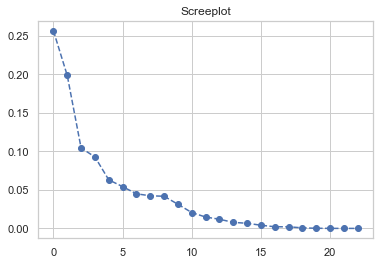

In [55]:
# Starting column number was 26, it is reduced to 15

pca_26 = PCA(n_components=23)
X_pca_26 = pca_26.fit(x_scaled).transform(x_scaled)
plt.title("Screeplot")
plt.plot(pca_26.explained_variance_ratio_, linestyle = "--", marker = "o")

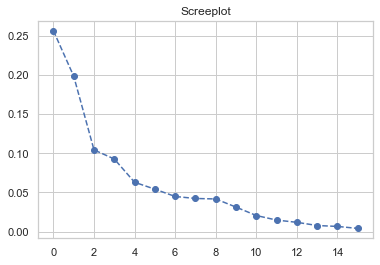

In [59]:

pca_15 = PCA(n_components=n)
X_pca_15 = pca_15.fit(x_scaled).transform(x_scaled)
plt.title("Screeplot")
plt.plot(pca_15.explained_variance_ratio_, linestyle = "--", marker = "o")

In [60]:
X_pca_15_df = pd.DataFrame(X_pca_15)

X_pca_15_df.to_csv('x4_pca.csv', index = False)

X_pca_15_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.682748,-0.335220,-2.517917,0.379358,0.087602,-0.129768,0.155554,-0.474875,0.673574,0.426165,0.609235,-0.023998,0.164944,0.700281,-1.586361,0.051842
1,-1.218323,-0.673252,5.192624,-0.679311,-0.648566,-0.763212,-0.908417,1.351969,-2.795273,-0.024330,2.029748,-0.188677,0.357068,1.125336,-2.476417,-0.076171
2,-0.185317,14.647125,2.574012,2.576012,-3.267142,-10.935389,0.579791,-2.555601,2.923058,-2.211156,-1.083468,-3.585967,-0.171333,0.539572,0.271489,-0.249436
3,-0.312404,3.837255,0.000068,-1.074942,0.767899,2.270040,0.044811,0.912617,-0.743616,-0.074235,-0.127070,-1.422074,0.532137,0.128549,0.070012,0.751616
4,-0.307578,1.529323,-0.406844,-1.909804,1.703864,1.452445,0.116342,-0.077155,0.373765,-4.105870,0.030470,-1.514710,0.150369,0.168859,0.058255,0.103858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.244552,-0.117452,-0.704931,-0.219911,0.321650,0.208244,-0.098843,-0.132099,0.198413,-0.108308,-0.050734,-0.137565,-0.281196,-0.161291,-0.060338,0.025452
906,-0.248287,-0.111658,-0.971809,-0.220957,0.402025,-0.005679,0.063077,-0.203275,0.346554,-0.502374,-0.056881,-0.133934,-0.338589,-0.451084,-0.128513,-0.030906
907,0.175425,-0.199704,0.407519,1.112702,1.595820,0.182670,0.067751,-0.150653,0.318600,-0.795222,-0.109237,-0.026406,-0.703944,-0.208105,-0.458663,0.048925
908,-0.234971,-0.403843,0.039635,-0.506467,0.382031,-0.161020,-0.026254,0.222169,-0.056683,-0.248100,0.287814,-0.226097,-0.555574,-0.015850,-0.002337,-0.001699


In [61]:
turkey

,symbol,shortName,country,averageVolume,currentPrice,currency,sector,industry,profitMargins,operatingMargins,...,bookValue,marketCap,enterpriseValue,earningsQuarterlyGrowth,enterpriseToRevenue,beta,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiftyDayAverage,twoHundredDayAverage
0,GARAN.IS,GARANTI BANKASI,Turkey,147291122,9.39,TRY,Financial Services,Banks—Regional,0.30776,0.36997,...,16.025,4.585135e+09,3.326488e+09,0.755,1.050,1.200986,1.256791,0.748726,1.095021,0.965851
1,AKBNK.IS,AKBANK,Turkey,65229093,5.55,TRY,Financial Services,Banks—Regional,0.35343,0.47333,...,12.944,3.355317e+09,7.206951e+09,0.331,2.918,1.043517,0.887078,0.540618,0.653990,0.620627
2,ISCTR.IS,IS BANKASI (C),Turkey,40740588,5.27,TRY,Financial Services,Banks—Regional,0.22107,0.24507,...,15.618,2.761096e+09,1.293720e+10,0.355,3.221,1.167339,0.856850,0.541780,0.641533,0.610627
3,YKBNK.IS,YAPI VE KREDI BANK.,Turkey,193645340,2.45,TRY,Financial Services,Banks—Regional,0.35071,0.45748,...,6.205,2.406071e+09,1.100453e+10,0.677,5.266,1.266038,0.390640,0.229036,0.293976,0.269988
4,SAHOL.IS,SABANCI HOLDING,Turkey,15962974,9.67,TRY,Financial Services,Banks—Regional,0.24126,0.48564,...,20.351,2.291788e+09,1.680871e+10,0.652,5.811,0.940331,1.384679,0.855687,1.160692,1.074268
5,VAKBN.IS,VAKIFLAR BANKASI,Turkey,37962129,3.44,TRY,Financial Services,Banks—Regional,0.27534,0.33972,...,12.257,1.562017e+09,1.600839e+10,-0.681,9.873,1.005832,0.581309,0.383664,0.410803,0.416339
6,HALKB.IS,T. HALK BANKASI,Turkey,42513503,4.67,TRY,Financial Services,Banks—Regional,0.13151,0.12474,...,17.067,1.343121e+09,1.047013e+10,-0.905,8.886,0.877074,0.723149,0.477836,0.549686,0.547236
7,TSKB.IS,T.S.K.B.,Turkey,54790443,1.25,TRY,Financial Services,Banks—Regional,0.56165,0.67945,...,2.170,4.069165e+08,5.181443e+09,0.174,35.141,0.861123,0.324371,0.120912,0.152502,0.156580
8,ALBRK.IS,ALBARAKA TURK,Turkey,11662026,1.52,TRY,Financial Services,Banks—Regional,0.20106,0.24412,...,3.117,2.385693e+08,-8.424334e+05,3.810,-0.004,1.047287,0.318557,0.167417,0.175323,0.188279
9,SKBNK.IS,SEKERBANK,Turkey,37425039,1.01,TRY,Financial Services,Banks—Regional,0.10575,0.10232,...,1.473,2.184095e+08,1.812605e+08,-0.811,0.989,1.109411,0.206389,0.117424,0.121411,0.130246


Resources:
1. SelectKBest source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
2. f-regression source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
3. mutual info regression: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression
4. tree-based feature selection source: https://scikit-learn.org/stable/modules/feature_selection.html
